# Support Vector Machine

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower']=df.target.apply(lambda x: iris.target_names[x])

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
from matplotlib import pyplot as plt

In [10]:
%matplotlib inline

In [12]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

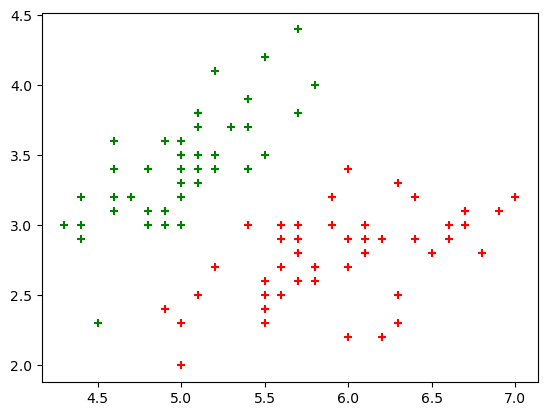

In [18]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='+')

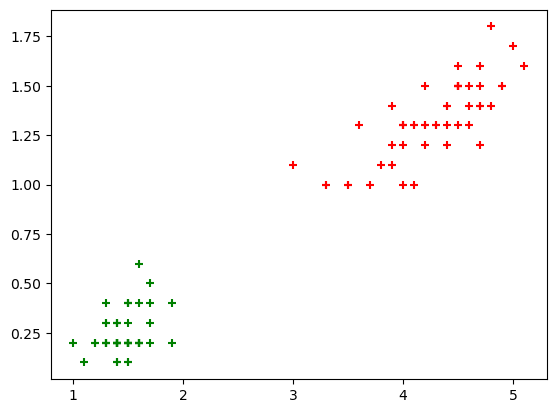

In [19]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='+')

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop(['target','flower'],axis='columns')

In [26]:
y=df.target

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [32]:
from sklearn.svm import SVC

In [48]:
#model=SVC(C=10)
model=SVC(gamma=100)

In [49]:
model.fit(xtrain,ytrain)

SVC(gamma=100)

In [50]:
model.predict(xtest)

array([2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0,
       0, 2, 2, 2, 2, 2, 2, 2])

In [51]:
model.score(xtest,ytest)

0.6666666666666666

In [47]:
ytest

22     0
120    2
91     1
38     0
76     1
105    2
25     0
53     1
2      0
45     0
72     1
138    2
126    2
100    2
56     1
28     0
101    2
41     0
12     0
58     1
96     1
29     0
34     0
117    2
102    2
51     1
61     1
140    2
142    2
85     1
Name: target, dtype: int32

## Excercise

In [52]:
from sklearn.datasets import load_digits

In [53]:
digits = load_digits()

In [54]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [61]:
x=digits.data
y=digits.target

In [62]:
x
y

array([0, 1, 2, ..., 8, 9, 8])

In [63]:
dtrain,dtest,etrain,etest=train_test_split(digits.data,digits.target,test_size=0.2)

In [66]:
model2=SVC()
model2.fit(dtrain,etrain)

SVC()

In [67]:
model2.predict(dtest[0:10])

array([5, 8, 2, 1, 1, 4, 0, 7, 8, 6])

In [69]:
etest[0:10]

array([5, 8, 2, 1, 1, 4, 0, 7, 8, 6])

In [70]:
model2.score(dtest,etest)

0.9777777777777777

In [71]:
from sklearn.metrics import confusion_matrix

In [74]:
pred=model2.predict(dtest)
c=confusion_matrix(etest,pred)

Text(95.72222222222221, 0.5, 'actual')

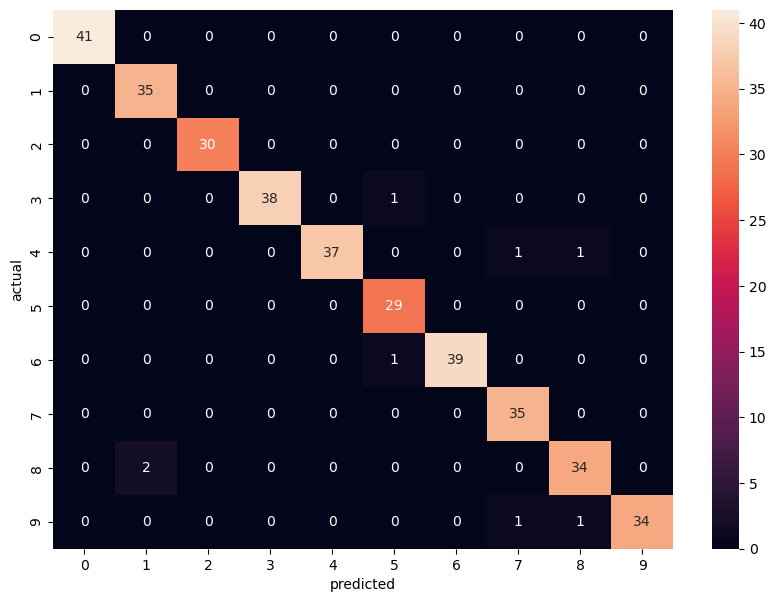

In [75]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')